<img src="vua.png">

Koristeći Pandas analizirat će mo podatke o vido igrama skinute s IGN-a (jedan od stranica sa recenzijama). Analiziranjem recenzija naučit će mo osnove Pandas biblioteke.

Probat će mo pronaći odgovore tipa:
Da li igre tipa Witcher 3 dobijaju bolje recenzije na PS4 od onih na Xbox One?

# Učitavanje podataka u Pandas

Prvi korak je učitavanje podataka. Podaci su spremljeni u csv formatu (comma-separated values), gdje je svaki redak odvojen karakterom za novu liniju a stupci s zarezom (,). Dokument se nalazi u mapi Lab02 podimenom ign.csv.
Kako radimo na linux poslužitelju prvo pogledamo imamo li dokument i njegov izgled dokumenta.

Uz pomoć uskličnika (!) na početku retka možemo izvršavati *shell* naredbe. Pa probajmo izvršiti naredbu *ls*

In [1]:
! ls

cars.csv		 Euklidska_distanca.png  Min-Max.png   vua.png
DecimalnoSkaliranje.png  ign.csv		 Pandas.ipynb  Z-skaliranje.png


Dobili smo popis svih datoteka u radnoj mapi. sad pogledajmo kako izgleda datoteka ign.csv. To možemo postići naredbm *cat* za ispis cjele datoteke ili *head* za prikaz prvih 10 redaka.

In [2]:
! head ign.csv

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero Edition,/games/littlebigplanet-ps-vita-marvel-super-hero-edition/vita-20027059,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
5,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/mac-142565,Macintosh,7.0,Strategy,N,2012,9,11
6,Awful,Double Dragon: Neon,/games/double-dragon-neon/xbox-360-131320,Xbox 360,3.0,Fighting,N,2012,9,11
7,Amazing,Guild Wars 2,/games/guild-wars-2/pc-896298,PC,9.0,RPG,Y,2012,9,11
8,Awful,Double Dragon: Neon,/games/double-dragon-neon/ps3-131321,PlayStation 3

Kako vidite svaki redak sadrži podatke jedne recenzije, a stupci informacije o igri:
 * `score_phrase` – IGN opis igre. povezano s ocjenom
 * `title` – naziv igre
 * `url` – URL pune recenzije
 * `platform` – platforma na kojoj je napravljena recenzija (PC, PS4, ...)
 * `score` – ocjena (1.0 to 10.0)
 * `genre` – žanr igre
 * `editors_choice` – Preporuka uredništva (N - ne, Y - da)
 * `release_year` – godina izdavanja
 * `release_month` – mjesec izdavanja
 * `release_day` – dan izdavanja
Tu je još i prvi stupac s indeksom retka.

### Za obradu podataka potrebno ih je učitati iz csv dokumenta

Prvo moramo učitati *Pandas* biblioteku s naredbom *import*. Nakon naziva biblioteke možemo dodati i parametar *as* pa napisati skračeni naziv koji kasnije možemo koristiti za pristup funkcijama biblioteke.

In [3]:
import pandas as pd

Pandas funkcijom *read_csv* možemo učitati ing.csv datoteku u varijablu *recenzije*.

In [4]:
recenzije = pd.read_csv("ign.csv")

Nakon učitavanja u *DataFrame*, *Pandas* nam omogućuje da pogledamo cjeli skup podataka ili samo prvih ili zadnjih *N* redaka. To su funkcije:
 * DataFrame.head() – ispis prvih *N* redaka. Ako ne definiramo N bit će 5.
 * DataFrame.tail() – ispis zadnjih *N* redaka. Ako ne definiramo N bit će 5.
Korištenjem metode *head* pogledajmo prvih 5 redaka

In [5]:
recenzije.head()

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


Korištenjem svojstva *shape* možemo vidjeti koliko redaka i stupaca ima naš DataFrame:

In [6]:
recenzije.shape

(18625, 11)

Ako je učitavanje proteklo bez problema trebali bi imati 18625 redaka i 11 stupaca (18625, 11)

Kao što možete uočiti *Pandas* nam omogućuje da imamo različite tipove podataka u različitim stupcima.

Prethodno smo koristili metodu *head* da bi prikazali retke na početku DataFramea. Isto smo mogli postići i sa metodom *iloc*.
Sljedeća naredba vratit će isti rezultat kao i prethodno pokrenuta s metodom hjead.

In [7]:
recenzije.iloc[0:5,:]

,Unnamed: 0,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


U metodi *iloc* definirali smo da želimo retke 0:5.
 * 0:5 - uzima retke s od onog s indeksom 0 do onog s indeksom 5 ali zadnjeg ne uključuje u rezultat.
 
Dobili smo retke s indeksom 0,1,2,3 i 4.
Jednako tako isti rezltat smo mogli postići da smo napisali :5, jer ako ne stavimo prvi broj *Pandas* predpostavlja da želimo odgovor od početka DataFramea, odnosno ako izostavimo drug da želimo do kraja.

Kako smo željei sve stupce jednostavno smo izostavili oba broja.

Neki primjeri indeksiranja s opisom:
 * recenzije.iloc[0:5,:] - prvih 5 redaka i svi stupci
 * recenzije.iloc[:,:] – cjeli DataFrame
 * recenzije.iloc[5:,5:] – redci od 5. do kraja i stupci od 5. do kraja
 * recenzije.iloc[:,0] – prvi stupac sa svim redcima
 * recenzije.iloc[9,:] – 10. redak sa svim stupcima
 
Indeksiranje je jako slično onome u biblioteci *NumPy*. Ako želite naučiti više o tome upute možete pogledati na linku [NumPy](http://www.dataquest.io/blog/numpy-tutorial-python/).

Sada kada znamo označavati po pozicijama maknimo prvi stupac jer nema korisnih informacija.

Našoj Varijabli *recenzije* dodjeljujemo rezlltatz metode *iloc*.

In [8]:
recenzije = recenzije.iloc[:,1:]

In [9]:
recenzije.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11


Ono što na *Pandas* još omogućuje da indeksiramo po nazivima redaka i stupaca. Kada želimo raditi s nazivima umjesto metode *iloc* koristimo metodu *loc*.

Kada pokrenemo sljedeću naredbu dobit će morezultaa kao da smo koristili prethodnu metodu *iloc*. 

In [10]:
recenzije.loc[0:5,:]

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11
5,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/mac-142565,Macintosh,7.0,Strategy,N,2012,9,11


To je tako zato što su nam redci indeksirani brojevima. 

Provjerimo s propertijem *index*.

In [11]:
recenzije.index

RangeIndex(start=0, stop=18625, step=1)

Indeksi nisu uvjek jednaki s pozicijom retka, ako primjerice u neku drugu varijablu *neki_redci* pospremino retke od 10 do 20 iz *recenzije* i prikažemo novi DataFrame vidimo da to su indeksi ostali.

In [12]:
neki_redci = recenzije.iloc[10:20,]
neki_redci

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
10,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/ps3-124584,PlayStation 3,7.5,Fighting,N,2012,9,11
11,Good,Tekken Tag Tournament 2,/games/tekken-tag-tournament-2/xbox-360-124581,Xbox 360,7.5,Fighting,N,2012,9,11
12,Good,Wild Blood,/games/wild-blood/iphone-139363,iPhone,7.0,NaN,N,2012,9,10
13,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/xbox-360-129276,Xbox 360,9.0,"Action, Adventure",Y,2012,9,7
14,Amazing,Mark of the Ninja,/games/mark-of-the-ninja-135615/pc-143761,PC,9.0,"Action, Adventure",Y,2012,9,7
15,Okay,Home: A Unique Horror Adventure,/games/home-a-unique-horror-adventure/mac-2001...,Macintosh,6.5,Adventure,N,2012,9,6
16,Okay,Home: A Unique Horror Adventure,/games/home-a-unique-horror-adventure/pc-137135,PC,6.5,Adventure,N,2012,9,6
17,Great,Avengers Initiative,/games/avengers-initiative/iphone-141579,iPhone,8.0,Action,N,2012,9,5
18,Mediocre,Way of the Samurai 4,/games/way-of-the-samurai-4/ps3-23516,PlayStation 3,5.5,"Action, Adventure",N,2012,9,3
19,Good,JoJo's Bizarre Adventure HD,/games/jojos-bizarre-adventure/xbox-360-137717,Xbox 360,7.0,Fighting,N,2012,9,3


Ako probamo sad pristupiti nekom retku koji nije u DataFrameu rezultat neće odgovarati onome što smo željeli.

In [13]:
neki_redci.loc[5:9,:]

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day


A ako to napravimo s metodom *iloc* dobit će mo željene retke.

In [14]:
neki_redci.iloc[5:9,:]

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day
15,Okay,Home: A Unique Horror Adventure,/games/home-a-unique-horror-adventure/mac-2001...,Macintosh,6.5,Adventure,N,2012,9,6
16,Okay,Home: A Unique Horror Adventure,/games/home-a-unique-horror-adventure/pc-137135,PC,6.5,Adventure,N,2012,9,6
17,Great,Avengers Initiative,/games/avengers-initiative/iphone-141579,iPhone,8.0,Action,N,2012,9,5
18,Mediocre,Way of the Samurai 4,/games/way-of-the-samurai-4/ps3-23516,PlayStation 3,5.5,"Action, Adventure",N,2012,9,3


Kako smo prethodno spomenuli metodom *loc* možemo nazivima pristupati i stupcima. Umjesto da pamtimo pozicije stupaca možemo pristupati s nazivima.

In [15]:
recenzije.loc[:5,"score"]

0    9.0
1    9.0
2    8.5
3    8.5
4    8.5
5    7.0
Name: score, dtype: float64

Jadnako tako možemo prosljeriti i listu stupaca.

In [16]:
recenzije.loc[:5,["score", "release_year"]]

,score,release_year
0,9.0,2012
1,9.0,2012
2,8.5,2012
3,8.5,2012
4,8.5,2012
5,7.0,2012


Dosad smo vidjeli da pojedinom stupcu možemo pristupiti kroz metode *iloc* i *loc* , pa primjerice naredbe:
 * recenzije.iloc[:,1]
 * recenzije.loc[:,"score_phrase"]

vračaju drugi stupac.

Postoji i treći (najlakši) način za pristupiti stupcu, gdje nakon naziva DataFramea jednostavno u uglatim zagradama pošaljemo naziv stupaca ili listu naziva stupaca.

In [17]:
recenzije["score"]

0         9.0
1         9.0
2         8.5
3         8.5
4         8.5
5         7.0
6         3.0
7         9.0
8         3.0
9         7.0
10        7.5
11        7.5
12        7.0
13        9.0
14        9.0
15        6.5
16        6.5
17        8.0
18        5.5
19        7.0
20        7.0
21        7.5
22        7.5
23        7.5
24        9.0
25        7.0
26        9.0
27        7.5
28        8.0
29        6.5
         ... 
18595     4.4
18596     6.5
18597     4.9
18598     6.8
18599     7.0
18600     7.4
18601     7.4
18602     7.4
18603     7.8
18604     8.6
18605     6.0
18606     6.4
18607     7.0
18608     5.4
18609     8.0
18610     6.0
18611     5.8
18612     7.8
18613     8.0
18614     9.2
18615     9.2
18616     7.5
18617     8.4
18618     9.1
18619     7.9
18620     7.6
18621     9.0
18622     5.8
18623    10.0
18624    10.0
Name: score, Length: 18625, dtype: float64

In [32]:

ocjena_filter = recenzije["score"] > 7
ocjena_filter

,score,release_year
0,9.0,2012
1,9.0,2012
2,8.5,2012
3,8.5,2012
4,8.5,2012
5,7.0,2012
6,3.0,2012
7,9.0,2012
8,3.0,2012
9,7.0,2012


Kada pristupama samo jednom stupcu rezultat postaje Pandas serija, dok više stupaca je uvjek Pandas DataFrame.

In [19]:
type(recenzije)

pandas.core.frame.DataFrame

In [20]:
type(recenzije["score"])

pandas.core.series.Series

Da bi bolje shvatili kako rade možemo i ručno napraviti Seriju

In [21]:
s1 = pd.Series([1,2])

In [22]:
s1

0    1
1    2
dtype: int64

Serije mogu imati bilo koji tip podataka. Idemo napraviti novu s stringovima.

In [23]:
s2 = pd.Series(["Boris Yeltsin", "Mikhail Gorbachev"])

In [24]:
s2

0        Boris Yeltsin
1    Mikhail Gorbachev
dtype: object

In [25]:
Sad kad imamo dvije serije od njih možemo napraviti DataFrame

SyntaxError: invalid syntax (<ipython-input-25-1423d6ee273d>, line 1)

In [33]:
pd.DataFrame([s1,s2])

,0,1
0,1,2
1,Boris Yeltsin,Mikhail Gorbachev


Isti rezultat smo mogli napraviti i slanjem liste listi.

In [34]:
pd.DataFrame(
    [
        [1,2],
        ["Boris Yeltsin", "Mikhail Gorbachev"]
    ]
)

,0,1
0,1,2
1,Boris Yeltsin,Mikhail Gorbachev


Jednako tako možemo i specificirati nazive stupaca i nazive redaka kod definiranja DataFramea.

In [35]:
frame = pd.DataFrame(
    [
        [1,2],
        ["Boris Yeltsin", "Mikhail Gorbachev"]
    ],
    index=["row1", "row2"],
    columns=["column1", "column2"]
)
frame

,column1,column2
row1,1,2
row2,Boris Yeltsin,Mikhail Gorbachev


Postoji i drugi način u kojem možemo poslati rječnik (dictionary) u DataFrame

In [36]:
frame = pd.DataFrame(
    {
        "column1": [1, "Boris Yeltsin"],
        "column2": [2, "Mikhail Gorbachev"]
    }
)
frame

,column1,column2
0,1,2
1,Boris Yeltsin,Mikhail Gorbachev


## Metode na Serijama i DataFramovima

Skoro sve metoda koje koristimo na DataFrameu možemo koristiti i na Serijama. Primjerice metoda *head* vrača prvih N zapisa u stupcu.

In [37]:
recenzije["title"].head()

0                              LittleBigPlanet PS Vita
1    LittleBigPlanet PS Vita -- Marvel Super Hero E...
2                                 Splice: Tree of Life
3                                               NHL 13
4                                               NHL 13
Name: title, dtype: object

Možemo koristiti i metodu *mean* za srednju vrijednost.

In [38]:
recenzije["score"].mean()

6.950459060402666

In [39]:
recenzije.mean()

score               6.950459
release_year     2006.515329
release_month       7.138470
release_day        15.603866
dtype: float64

Kao što vidite kad se pokrene *mean* na DataFrameu rezultat je samo od stupaca koji su numerički.

Ako nam je potrebno možemo promjeniti i os (axis) računanja. Predefinirano je axis=0 pa rezultati su vezani za stupce, ako pak stavimo axis=1 onda će se rezultat odnositi na retke.

In [40]:
recenzije.mean(axis=1)

0        510.500
1        510.500
2        510.375
3        510.125
4        510.125
5        509.750
6        508.750
7        510.250
8        508.750
9        509.750
10       509.875
11       509.875
12       509.500
13       509.250
14       509.250
15       508.375
16       508.375
17       508.500
18       507.375
19       507.750
20       507.750
21       514.625
22       514.625
23       514.625
24       515.000
25       514.250
26       514.750
27       514.125
28       514.250
29       513.625
          ...   
18595    510.850
18596    510.875
18597    510.225
18598    510.700
18599    510.750
18600    512.600
18601    512.600
18602    512.600
18603    512.450
18604    512.400
18605    511.500
18606    508.600
18607    510.750
18608    510.350
18609    510.750
18610    510.250
18611    508.700
18612    509.200
18613    508.000
18614    515.050
18615    515.050
18616    508.375
18617    508.600
18618    515.025
18619    514.725
18620    514.650
18621    515.000
18622    513.9

Naravno imamo i drugih metoda:
 * DataFrame.corr – ispisuje koeficjent korelacije stupaca u DataFrameu
 * DataFrame.count – ispisuje broj non-null vrjednosti u stupcima
 * DataFrame.max – ispisuje največi broj u stupcima
 * DataFrame.min – ispisuje najmanji broj u stupcima
 * DataFrame.median – ispisuje median u stupcima
 * DataFrame.std – ispisuje standardnu devijaciju u stupcima

Pogledamo korelaciju na našem DataFrameu

In [41]:
recenzije.corr()

,score,release_year,release_month,release_day
score,1.000000,0.062716,0.007632,0.020079
release_year,0.062716,1.000000,-0.115515,0.016867
release_month,0.007632,-0.115515,1.000000,-0.067964
release_day,0.020079,0.016867,-0.067964,1.000000


Kada pogledamo tablicu korelacije vidimo da niti jedna od naših numeričkih varijabli nije korelirana s rezultatom (score)

### Matematičke operacije s Pandasom

Na serijama možemo jednostavno izvršavati matematičke operacije.

Možemo koristiti sve matematičke operatore iz Pythona (+, -, \*, /, ^) i primjenit će se na svakom elementu DataFramea ili Serije.

In [42]:
recenzije["score"] / 2

0        4.50
1        4.50
2        4.25
3        4.25
4        4.25
5        3.50
6        1.50
7        4.50
8        1.50
9        3.50
10       3.75
11       3.75
12       3.50
13       4.50
14       4.50
15       3.25
16       3.25
17       4.00
18       2.75
19       3.50
20       3.50
21       3.75
22       3.75
23       3.75
24       4.50
25       3.50
26       4.50
27       3.75
28       4.00
29       3.25
         ... 
18595    2.20
18596    3.25
18597    2.45
18598    3.40
18599    3.50
18600    3.70
18601    3.70
18602    3.70
18603    3.90
18604    4.30
18605    3.00
18606    3.20
18607    3.50
18608    2.70
18609    4.00
18610    3.00
18611    2.90
18612    3.90
18613    4.00
18614    4.60
18615    4.60
18616    3.75
18617    4.20
18618    4.55
18619    3.95
18620    3.80
18621    4.50
18622    2.90
18623    5.00
18624    5.00
Name: score, Length: 18625, dtype: float64

I jednoako tako rezultat tih operacija možemo pospremiti u novi stupac.

In [43]:
recenzije["novi"] = recenzije["score"] / recenzije["release_day"]

In [44]:
recenzije

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day,novi
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12,0.750000
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12,0.750000
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12,0.708333
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11,0.772727
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11,0.772727
5,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/mac-142565,Macintosh,7.0,Strategy,N,2012,9,11,0.636364
6,Awful,Double Dragon: Neon,/games/double-dragon-neon/xbox-360-131320,Xbox 360,3.0,Fighting,N,2012,9,11,0.272727
7,Amazing,Guild Wars 2,/games/guild-wars-2/pc-896298,PC,9.0,RPG,Y,2012,9,11,0.818182
8,Awful,Double Dragon: Neon,/games/double-dragon-neon/ps3-131321,PlayStation 3,3.0,Fighting,N,2012,9,11,0.272727
9,Good,Total War Battles: Shogun,/games/total-war-battles-shogun/pc-142564,PC,7.0,Strategy,N,2012,9,11,0.636364


#### Boolean indeksiranje

Pandas nam omogućuje da radimo indeksiranje purem uvjeta kojima je rezultat bool Serija. <Primjerice želimo označiti samo recenzije s ocjenom večom od 7.

In [45]:
ocjena_filter = recenzije["score"] > 7
ocjena_filter

0         True
1         True
2         True
3         True
4         True
5        False
6        False
7         True
8        False
9        False
10        True
11        True
12       False
13        True
14        True
15       False
16       False
17        True
18       False
19       False
20       False
21        True
22        True
23        True
24        True
25       False
26        True
27        True
28        True
29       False
         ...  
18595    False
18596    False
18597    False
18598    False
18599    False
18600     True
18601     True
18602     True
18603     True
18604     True
18605    False
18606    False
18607    False
18608    False
18609     True
18610    False
18611    False
18612     True
18613     True
18614     True
18615     True
18616     True
18617     True
18618     True
18619     True
18620     True
18621     True
18622    False
18623     True
18624     True
Name: score, Length: 18625, dtype: bool

U serije *ocjena_filter* sada imamo True/False zapise kada je uvjer zadovoljen odnosno nije. Sad kada imamo *ocjena_filter* možemo napraviti selekciju da uzmemo samo zapise gdje je filter istinit.

In [46]:
filtrirane_recenzije = recenzije[ocjena_filter]
filtrirane_recenzije.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day,novi
0,Amazing,LittleBigPlanet PS Vita,/games/littlebigplanet-vita/vita-98907,PlayStation Vita,9.0,Platformer,Y,2012,9,12,0.750000
1,Amazing,LittleBigPlanet PS Vita -- Marvel Super Hero E...,/games/littlebigplanet-ps-vita-marvel-super-he...,PlayStation Vita,9.0,Platformer,Y,2012,9,12,0.750000
2,Great,Splice: Tree of Life,/games/splice/ipad-141070,iPad,8.5,Puzzle,N,2012,9,12,0.708333
3,Great,NHL 13,/games/nhl-13/xbox-360-128182,Xbox 360,8.5,Sports,N,2012,9,11,0.772727
4,Great,NHL 13,/games/nhl-13/ps3-128181,PlayStation 3,8.5,Sports,N,2012,9,11,0.772727


Naravno možemo i kombinirati uvjete pa primjerice uz ocjenu filtrirati i da bude na platformi Xbox one.

In [47]:
xbox_one_filter = (recenzije["score"] > 7) & (recenzije["platform"] == "Xbox One")
filtrirane_recenzije = recenzije[xbox_one_filter]
filtrirane_recenzije.head()

,score_phrase,title,url,platform,score,genre,editors_choice,release_year,release_month,release_day,novi
17137,Amazing,Gone Home,/games/gone-home/xbox-one-20014361,Xbox One,9.5,Simulation,Y,2013,8,15,0.633333
17197,Amazing,Rayman Legends,/games/rayman-legends/xbox-one-20008449,Xbox One,9.5,Platformer,Y,2013,8,26,0.365385
17295,Amazing,LEGO Marvel Super Heroes,/games/lego-marvel-super-heroes/xbox-one-20000826,Xbox One,9.0,Action,Y,2013,10,22,0.409091
17313,Great,Dead Rising 3,/games/dead-rising-3/xbox-one-124306,Xbox One,8.3,Action,N,2013,11,18,0.461111
17317,Great,Killer Instinct,/games/killer-instinct-2013/xbox-one-20000538,Xbox One,8.4,Fighting,N,2013,11,18,0.466667


Kada koristimo više uvjeta važno je da svaki uvjet stavimo u zagrade te između zagrada dodamo znak and (&).

### Histogram

Prvo pozivamo jednu naredbu da nam rezultate iscrtava u Jupyteru

In [48]:
%matplotlib inline

I idemo prikazati histogram za ocjene na Xbox One platformi.

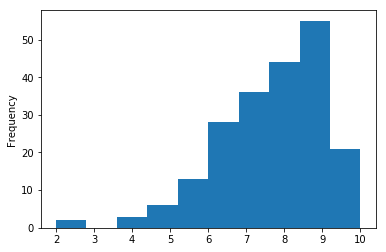

In [49]:
recenzije[recenzije["platform"] == "Xbox One"]["score"].plot(kind="hist")

Idemo sad to usporediti s PlayStation 4 platformom.

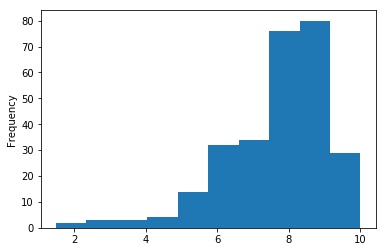

In [50]:
recenzije[recenzije["platform"] == "PlayStation 4"]["score"].plot(kind="hist")

Iz ovog možemo zaključiti da imamo više dobrih ocjena na PlayStation 4 platformi.

Naravno histogram možemo napraviti i na već filtriranim podacime (to su zasebni DataFrameovi)

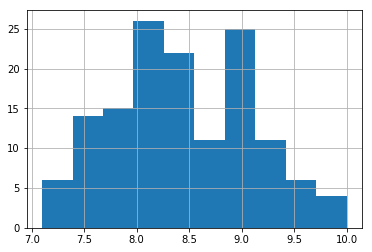

In [51]:
filtrirane_recenzije["score"].hist()

Na linku možete skinuti [Data Science Cheat Sheet](https://www.dataquest.io/blog/images/cheat-sheets/pandas-cheat-sheet.pdf)

## Zadatak

Iz DataFramea *recenzije* Napravite novi Dataframe *novi* u kojem će se nalaziti dva stupca. U jednom stupcu Naziv igre, a u drugom stupcu ocjena podjeljena s 2. Filtrirajte samo recenzije za *PlayStation 4* platformu.

In [78]:
import pandas as pd

test = {'title':recenzije["title"],'score':recenzije["score"] / 2}
a = pd.DataFrame(data=test)

filtr = recenzije["platform"] == 'PlayStation 4'
novi = a[filtr]

In [79]:
#bakon što završite pokrenite ovu čeliju
novi.to_csv('novi.csv')

# Priprema podataka za analizu
Na ovim vježbama upoznat ćemo se sa sljedećim pojmovima i tehnikama pripreme podataka za analizu:
- otkrivanje i supstitucija nedostajućih vrijednosti
- min-max normiranje

## Otkrivanje i supstitucija nedostajućih vrijednosti

Postojanje velikog broja nedostajućih vrijednosti uglavnom na prvi pogled asocira na nekvalitetne podatke, ali to
nužno ne mora uvijek biti istina. Problem je najveći kod atributa koji moraju biti potpuno (100%) popunjeni podacima, a ipak određeni postotak vrijednosti nedostaje. S druge strane, nedostajuće vrijednosti mogu biti korisni putokazi
kao i ekstremne vrijednosti. Primjerice klijenti koji daju podatke, a imaju smanjeni stupanj lojalnosti potencijalno zbog nezainteresiranosti ili planiranog reduciranja suradnje ili prekida ugovornog odnosa daju manje podataka ako nisu u situaciji da obavezno daju podatak. Praznina u obilježjima je informacija ravnopravna bilo kojoj drugoj informaciji. Problem jedino može nastati ako u podacima postoji visoki postotak neispunjenih vrijednosti atributa do te mjere da ugrožava analizu. Iskustvo pokazuje da je na razini atributa prihvatljiv postotak do dvadeset posto ako govorimo o takvim tipovima informacija.

### *Case-Based Reasoning*

Jedan od načina popunjavanja nedostajućih vrijednosti je primjena *Case-Based reasoning* metode, popularno zvane „pitaj svog susjeda“, koja temeljem proračuna sličnosti atributa između slogova, procjenjuje koji je slog najsličniji promatranom slogu kojem nedostaje vrijednost te mu dodaje vrijednost atributa najsličnijeg sloga. Ovdje treba biti oprezan kako bismo izbjegli **multiplikativni aproksimativni efekt** - aproksimaciju nedostajuće vrijednosti pomoću već aproksimirane vrijednosti.

> Općenito: *Case-Based reasoning* je metodologija rješavanja problema na temelju prethodnih iskustava. 

> Alternativne tehnike za aproksimaciju nedostajućih vrijednosti podrazumijevaju primjenu naprednijih metoda poput neuronskih mreža i/ili Bayesovih mreža. Općenito ne postoji univerzalno rješenje niti savršena tehnika, već izbor metode i analitičke strategije ovisi o tipu problema koji želimo riješiti, ciljevima analize i ostalim faktorima.

<br>
<div class="alert alert-info">
<b>Vježba: otkrivanje i supstitucija nedostajućih vrijednosti pomoću <i>Case-Based Reasoning</i> metode</b>
</div>

### Zadatak

> - Učitajte podatke iz datoteke cars.csv u Pandas DataFrame pod imenom df
> - Ispišite broj redaka i stupaca u učitanom DataFrameu?
> - Ispišite sadržaj prvih 5 redaka DataFrame-a na ekran

In [122]:
# Dopunite program prema uputama
import pandas as pd
import random
import math

df = pd.read_csv('cars.csv', sep=';')

print(df.shape)
print(df.head())

(957, 14)
   Car Code Manufacturer  Model           Body  Price       Color  Year  \
0         2          bmw  325td          sedan  28699    dark_red  1995   
1         3          bmw   320i          coupe  33299    dark_red  1995   
2         4          bmw   540i  station_wagon  87499  dark_green  1997   
3         5          bmw   520i  station_wagon  43599       black  1996   
4         6          bmw   316i       fastback  25599    dark_red  1995   

   Miles  Doors  Power       Gas  Speed   CCM  ZIP  
0  66474      4    115    diesel    203  2500    8  
1  31802      2    150  gasoline    241  3200    7  
2   9874      5    285  gasoline    252  4000    1  
3  32292      5    150  gasoline    183  2000    9  
4  53714      2    102  gasoline    183  1600    6  


> - Ispišite broj zapisa s nedostajućim vrijednostima
> - Obrišite (postavite na None) vrijednost polja **Manufacturer** u 10 slučajno odabranih redaka
> - Ponovno ispišite broj zapisa s nedostajućim vrijednostima
> - ispišite sve zapise s nedostajućim vrijednostima

In [124]:
import random

print(df.isnull().sum(axis = 0))

for x in range(10):
    df.at['Manufacturer', random.randint(1,df.shape[0])] = ''

    
print(df.isnull().sum(axis = 0))
print( df[df.isnull().any(axis=1)])

Car Code          1
Manufacturer      1
Model             1
Body              1
Price             1
Color             1
Year              1
Miles             1
Doors             1
Power             1
Gas               1
Speed             1
CCM               1
ZIP               1
256             957
1               957
154             957
472             957
403             957
108             957
210             957
121             957
52              957
879             957
dtype: int64
Car Code          1
Manufacturer      1
Model             1
Body              1
Price             1
Color             1
Year              1
Miles             1
Doors             1
Power             1
Gas               1
Speed             1
CCM               1
ZIP               1
256             957
1               957
154             957
472             957
403             957
108             957
210             957
121             957
52              957
879             957
221             957
419    

U ovom slučaju u kojem nam nedostaje proizvođač automobila u tablici, možemo pretpostaviti da su nam za identifikaciju proizvođača metodom *Case-Based Reasoning* dovoljna polja **Manufacturer**, **Model** i **Doors**.
Za pronalaženje najbližeg "susjeda" iskoristit ćemo euklidsku distancu koja se računa po formuli<br>
<img src="Euklidska_distanca.png">
Budući da polje **Model** nije numerička varijabla, prije računanja euklidske distance potrebno je tekst iz polja pretvoriti u brojčanu šifru
> - Uklonite sva ostala polja iz DataFramea
> - dodajte u DataFrame novo polje **numModel** s numeričkom šifrom modela
> - ispišite prvih 10 redaka DataFramea

In [143]:
import hashlib
    
def hashModel(row,places):
    getstr = str(row['Model']).encode('utf-8')
    hashstr = int(hashlib.sha1(getstr).hexdigest(), 16)
    cutstr = hashstr  % (10 ** places)
    return cutstr

df = df[['Manufacturer','Model','Doors']].copy()

df['numModel'] = df.apply (lambda row: hashModel(row,5), axis=1)
print(df.head(10))

    Manufacturer  Model  Doors  numModel
0            bmw  325td    4.0     29955
1            bmw   320i    2.0     44406
2            bmw   540i    5.0     76053
3            bmw   520i    5.0     52061
4            bmw   316i    2.0     68673
5            bmw   523i    5.0     19923
6            bmw   318i    2.0     59721
7            bmw   318i    4.0     59721
8            bmw   318i    4.0     59721
9  mercedes-benz  e_280    5.0     90219


## Normiranje podataka
Budući da varijable numModel i Doors koje želimo koristiti za određivanje najmanje distance nisu jednakog reda veličine potrebno ih je normirati. Postoji više načina na koje možemo normirati podatke. Neki od njih su:
- Min-Max normiranje
- Z-skaliranje
- Decimalno skaliranje

### Min-Max normiranje

Min-max normiranje svodi se na linearnu transformaciju izvornog raspona podataka na novi raspon, najčešće između 0-1.
<img src="Min-Max.png">
min’ – nova, normirana minimalna vrijednost<br>
max’- nova, normirana maksimalna vrijednost<br>
y’ - nova normirana vrijednost atributa<br>
min – minimalna vrijednost originalnog niza<br>
max - maksimalna vrijednost originalnog niza<br>
y - Izvorna vrijednost atributa

### Z-skaliranje

Koristimo ga u slučaju u kojem ne znamo minimalnu i maksimalnu vrijednost originalnog niza, a računa se po formuli:
<img src="Z-skaliranje.png">

### Decimalno skaliranje

<img src="DecimalnoSkaliranje.png">

U današnjoj vježbi koristit ćemo Min-Max normiranje.
> - dodajte u DataFrame novo polje **normModel** s Min-Max normiranom vrijednošću šifre modela iz polja **numModel**
> - dodajte u DataFrame novo polje **normDoors** s Min-Max normiranom vrijednošću šifre modela iz polja **Doors**
> - ispišite prvih 10 redaka DataFramea

In [171]:
def normalize(df,column,new_column):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[column].max()
        min_value = df[column].min()
        result[new_column] = (df[column] - min_value) / (max_value - min_value)
    return result

df = normalize(df,'numModel','normModel')
df = normalize(df,'Doors','normDoors')
print(df.head(10))

    Manufacturer  Model  Doors  numModel  normModel  normDoors
0            bmw  325td    4.0     29955   0.298663   0.666667
1            bmw   320i    2.0     44406   0.444409   0.000000
2            bmw   540i    5.0     76053   0.763585   1.000000
3            bmw   520i    5.0     52061   0.521613   1.000000
4            bmw   316i    2.0     68673   0.689154   0.000000
5            bmw   523i    5.0     19923   0.197485   1.000000
6            bmw   318i    2.0     59721   0.598868   0.000000
7            bmw   318i    4.0     59721   0.598868   0.666667
8            bmw   318i    4.0     59721   0.598868   0.666667
9  mercedes-benz  e_280    5.0     90219   0.906457   1.000000


> - ispišite broj redaka DataFramea **df**
> - Izdvojite retke DataFramea **df** s nedostajućim podacima o proizvođaču u zasebni DataFrame pod nazivom **df_missing**
> - Izbrišite retke DataFramea **df** s nedostajućim podacima o proizvođaču
> - ispišite broj redaka DataFramea **df_missing**
> - ponovno ispišite broj redaka DataFramea **df**
> - ispišite DataFrame **df_missing**


In [177]:
print(df.shape[0])
df_missing = df[pd.notnull(df['Manufacturer'])]
print(df[pd.notnull(df['Manufacturer'])])
print(df_missing.shape[0])
print(df.shape[0])
print(df_missing)

958
      Manufacturer         Model  Doors  numModel  normModel  normDoors
0              bmw         325td    4.0     29955   0.298663   0.666667
1              bmw          320i    2.0     44406   0.444409   0.000000
2              bmw          540i    5.0     76053   0.763585   1.000000
3              bmw          520i    5.0     52061   0.521613   1.000000
4              bmw          316i    2.0     68673   0.689154   0.000000
5              bmw          523i    5.0     19923   0.197485   1.000000
6              bmw          318i    2.0     59721   0.598868   0.000000
7              bmw          318i    4.0     59721   0.598868   0.666667
8              bmw          318i    4.0     59721   0.598868   0.666667
9    mercedes-benz         e_280    5.0     90219   0.906457   1.000000
10            audi    a4_1.9_tdi    5.0     80016   0.803554   1.000000
11             bmw        525tds    5.0     90061   0.904863   1.000000
12   mercedes-benz         c_200    5.0     65013   0.652241

> - Napišite program koji korištenjem formule za izračun euklidske distance pronalazi nedostajuće vrijednosti i zapisuje ih u DataFrame **df_missing** u polje **Manufacturer**
> - ispišite tablicu **df_missing** u kojoj su nedostajuće vrijednosti supstituirane metodom *Case-Based Reasoninga*.

In [178]:
# Ovdje napišite kôd koji rješava zadatak
print(df_missing)

      Manufacturer         Model  Doors  numModel  normModel  normDoors
0              bmw         325td    4.0     29955   0.298663   0.666667
1              bmw          320i    2.0     44406   0.444409   0.000000
2              bmw          540i    5.0     76053   0.763585   1.000000
3              bmw          520i    5.0     52061   0.521613   1.000000
4              bmw          316i    2.0     68673   0.689154   0.000000
5              bmw          523i    5.0     19923   0.197485   1.000000
6              bmw          318i    2.0     59721   0.598868   0.000000
7              bmw          318i    4.0     59721   0.598868   0.666667
8              bmw          318i    4.0     59721   0.598868   0.666667
9    mercedes-benz         e_280    5.0     90219   0.906457   1.000000
10            audi    a4_1.9_tdi    5.0     80016   0.803554   1.000000
11             bmw        525tds    5.0     90061   0.904863   1.000000
12   mercedes-benz         c_200    5.0     65013   0.652241   1

In [ ]:
#nakon što završite pokrenite ovu čeliju
df_missing.to_csv('novi2.csv')